In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
def plot_violin_graph(list_of_data, title):
    # Create a figure instance
    label = ["Baseline", "Z score", "With Means", "Basic"]
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    set_axis_style(ax, label)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()
    
def plot_violin_individual_dataset(list_of_data, title):
    # Create a figure instance
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()

### Cossine

In [3]:
knn_baseline_0 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/no_filter/knn_baseline_cosine_0.parquet")
knn_baseline_1 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/no_filter/knn_baseline_cosine_1.parquet")
knn_baseline_2 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/no_filter/knn_baseline_cosine_2.parquet")
knn_baseline_3 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/no_filter/knn_baseline_cosine_3.parquet")
knn_baseline_4 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/no_filter/knn_baseline_cosine_4.parquet")

knn_baseline = pd.concat([knn_baseline_0, knn_baseline_1, knn_baseline_2, knn_baseline_3, knn_baseline_4])

In [4]:
knn_with_z_score_0 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_0.parquet")
knn_with_z_score_1 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_1.parquet")
knn_with_z_score_2 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_2.parquet")
knn_with_z_score_3 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_3.parquet")
knn_with_z_score_4 = pd.read_parquet(f"../predictions/knn_with_z_score/anime_type_tv/no_filter/knn_with_z_score_cosine_4.parquet")

knn_with_z_score = pd.concat([knn_with_z_score_0, knn_with_z_score_1, knn_with_z_score_2, knn_with_z_score_3, knn_with_z_score_4])

In [5]:
knn_with_means_0 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_0.parquet")
knn_with_means_1 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_1.parquet")
knn_with_means_2 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_2.parquet")
knn_with_means_3 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_3.parquet")
knn_with_means_4 = pd.read_parquet(f"../predictions/knn_with_means/anime_type_tv/no_filter/knn_with_means_cosine_4.parquet")

knn_with_means = pd.concat([knn_with_means_0, knn_with_means_1, knn_with_means_2, knn_with_means_3, knn_with_means_4])

In [6]:
knn_basic_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_0.parquet")
knn_basic_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_1.parquet")
knn_basic_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_2.parquet")
knn_basic_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_3.parquet")
knn_basic_4 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_4.parquet")

knn_basic = pd.concat([knn_basic_0, knn_basic_1, knn_basic_2, knn_basic_3, knn_basic_4])

In [7]:
est_list = [
    knn_baseline["est"].to_list(),
    knn_with_z_score["est"].to_list(),
    knn_with_means["est"].to_list(),
    knn_basic["est"].to_list()
]

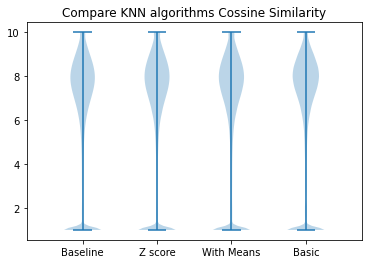

In [8]:
plot_violin_graph(est_list, title="Compare KNN algorithms Cossine Similarity")

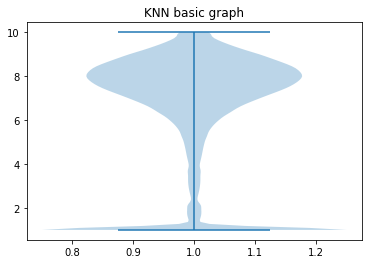

In [9]:
plot_violin_individual_dataset(knn_basic["est"].to_list(), title="KNN basic graph")

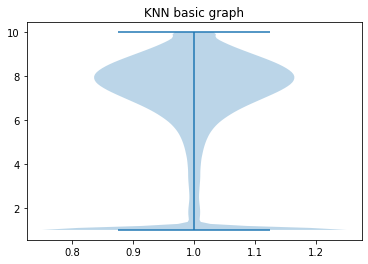

In [10]:
plot_violin_individual_dataset(knn_baseline["est"].to_list(), title="KNN basic graph")

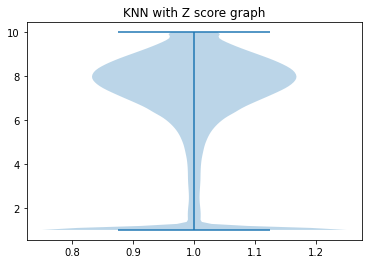

In [11]:
plot_violin_individual_dataset(knn_with_z_score["est"].to_list(), title="KNN with Z score graph")

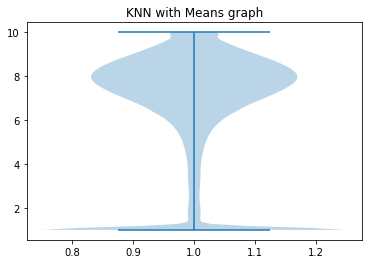

In [12]:
plot_violin_individual_dataset(knn_with_means["est"].to_list(), title="KNN with Means graph")

In [13]:
def round_est_values(df):
    round_actual = np.round(df["est"], decimals=0)
    round_actual = round_actual.reset_index()
    df = df.reset_index()[["index", "actual", "details"]]
    df = df.merge(round_actual, on="index", how="left")
    df = df.set_index("index")
    grouped = df.groupby("est", as_index=False).count()
    return grouped

In [14]:
knn_baseline_grouped = round_est_values(knn_baseline)
print(knn_baseline_grouped)

    est   actual  details
0   1.0  3634520  3634520
1   2.0   420845   420845
2   3.0   417270   417270
3   4.0   518480   518480
4   5.0   904735   904735
5   6.0  2209620  2209620
6   7.0  5306181  5306181
7   8.0  7407765  7407765
8   9.0  4531730  4531730
9  10.0  1066830  1066830


In [15]:
knn_with_z_score_grouped = round_est_values(knn_with_z_score)
print(knn_with_z_score_grouped)

    est   actual  details
0   1.0  3561495  3561495
1   2.0   443090   443090
2   3.0   433420   433420
3   4.0   521675   521675
4   5.0   890455   890455
5   6.0  2168350  2168350
6   7.0  5157386  5157386
7   8.0  7360305  7360305
8   9.0  4686670  4686670
9  10.0  1195130  1195130


In [16]:
knn_basic_grouped = round_est_values(knn_basic)
print(knn_basic_grouped)

    est   actual  details
0   1.0  3591986  3591986
1   2.0   450210   450210
2   3.0   412075   412075
3   4.0   485465   485465
4   5.0   816745   816745
5   6.0  1948625  1948625
6   7.0  5045000  5045000
7   8.0  7902960  7902960
8   9.0  4858960  4858960
9  10.0   905950   905950


In [17]:
knn_with_means_grouped = round_est_values(knn_with_means)
print(knn_with_means_grouped)

    est   actual  details
0   1.0  3559320  3559320
1   2.0   445555   445555
2   3.0   428670   428670
3   4.0   517560   517560
4   5.0   889245   889245
5   6.0  2158385  2158385
6   7.0  5198925  5198925
7   8.0  7433786  7433786
8   9.0  4633635  4633635
9  10.0  1152895  1152895


In [18]:
knn_baseline_grouped = knn_baseline_grouped.rename(columns={"actual": "knn_baseline"})
knn_with_z_score_grouped = knn_with_z_score_grouped.rename(columns={"actual": "knn_with_z_score"})
knn_basic_grouped = knn_basic_grouped.rename(columns={"actual": "knn_basic"})
knn_with_means_grouped = knn_with_means_grouped.rename(columns={"actual": "knn_with_means"})

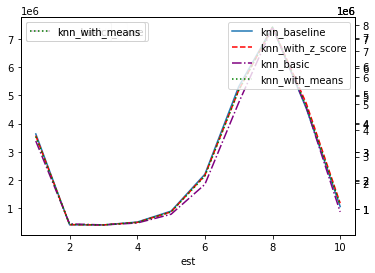

In [19]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()

knn_baseline_grouped.plot(x="est", y=["knn_baseline"], ax=ax)
knn_with_z_score_grouped.plot(x="est", y=["knn_with_z_score"], ax=ax1, ls="dashed", color="red")
knn_basic_grouped.plot(x="est", y=["knn_basic"], ax=ax2, ls="dashdot", color="purple")
knn_with_means_grouped.plot(x="est", y=["knn_with_means"], ax=ax3, ls="dotted", color="green")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

### Remove -1

In [20]:
knn_baseline_0 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_0.parquet")
knn_baseline_1 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_1.parquet")
knn_baseline_2 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_2.parquet")
knn_baseline_3 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_3.parquet")
knn_baseline_4 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_4.parquet")

knn_baseline = pd.concat([knn_baseline_0, knn_baseline_1, knn_baseline_2, knn_baseline_3, knn_baseline_4])

FileNotFoundError: ../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_0.parquet

In [ ]:
knn_baseline_0 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_0.parquet")
knn_baseline_1 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_1.parquet")
knn_baseline_2 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_2.parquet")
knn_baseline_3 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_3.parquet")
knn_baseline_4 = pd.read_parquet(f"../predictions/knn_baseline/anime_type_tv/with_filter_remove_negative/knn_baseline_cosine_4.parquet")

knn_baseline = pd.concat([knn_baseline_0, knn_baseline_1, knn_baseline_2, knn_baseline_3, knn_baseline_4])